In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [21]:
from astropy.cosmology import Planck18
import astropy.cosmology as cosmo
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
import seaborn as sns

In [3]:
interp_likelihoods = []
for f in glob("GW*.csv"):
    data = np.loadtxt(f, delimiter=',')
    reps = 1
    interp_likelihoods.append((reps, data))
for f in glob("Outlier*.csv"):
    data = np.loadtxt(f, delimiter=',')
    reps = 1
    interp_likelihoods.append((reps, data))
for f in glob("Random*.csv"):
    data = np.loadtxt(f, delimiter=',')
    reps = 16 # 5*16 = 80, plus the other 8
    interp_likelihoods.append((reps, data))

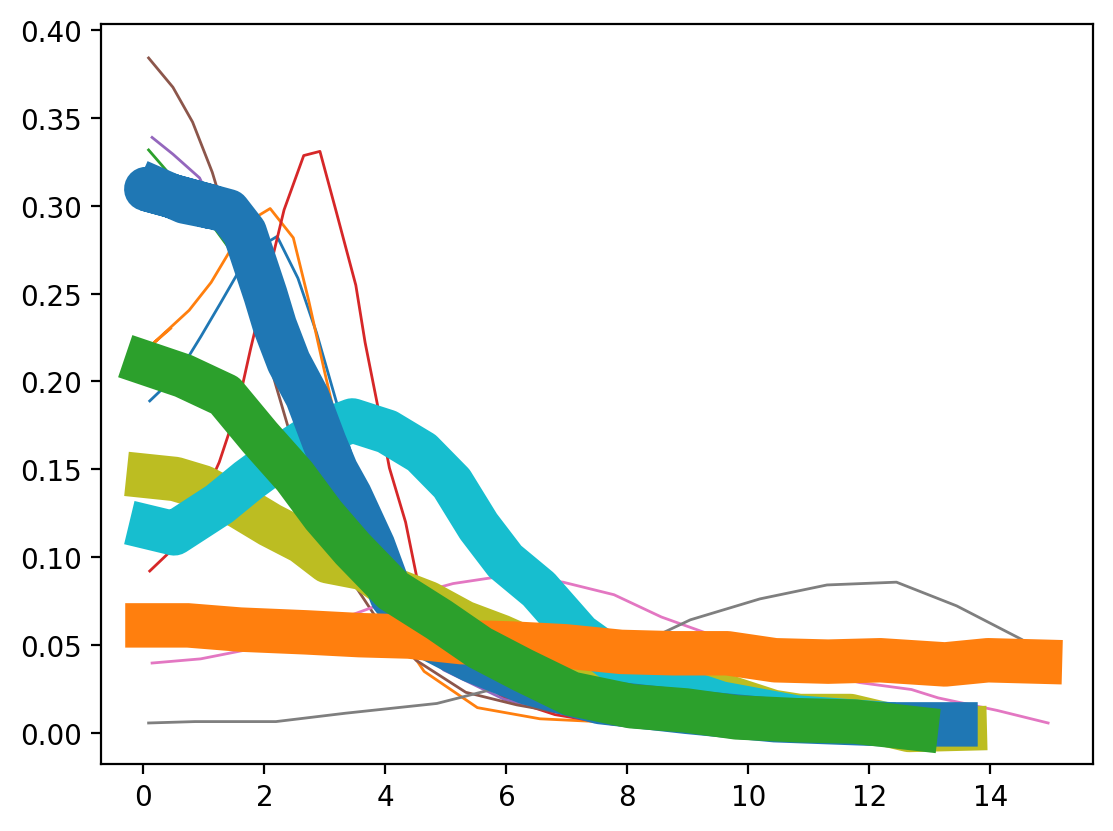

In [4]:
for reps, data in interp_likelihoods:
    plt.plot(data[:,0], data[:,1], lw=reps)

In [5]:
joint_likelihood_xs = np.linspace(0, 10, 1024)
log_likelihoods = np.array([reps * np.interp(joint_likelihood_xs, data[:,0], np.log(data[:,1])) for (reps, data) in interp_likelihoods])

In [6]:
log_likelihood = np.sum(log_likelihoods, axis=0)
log_likelihood -= np.max(log_likelihood)
log_likelihood -= np.trapz(np.exp(log_likelihood), joint_likelihood_xs)

Text(0.5, 0, '$M_{PV}^{-1}$ [$10^{21} / \\mathrm{GeV}$]')

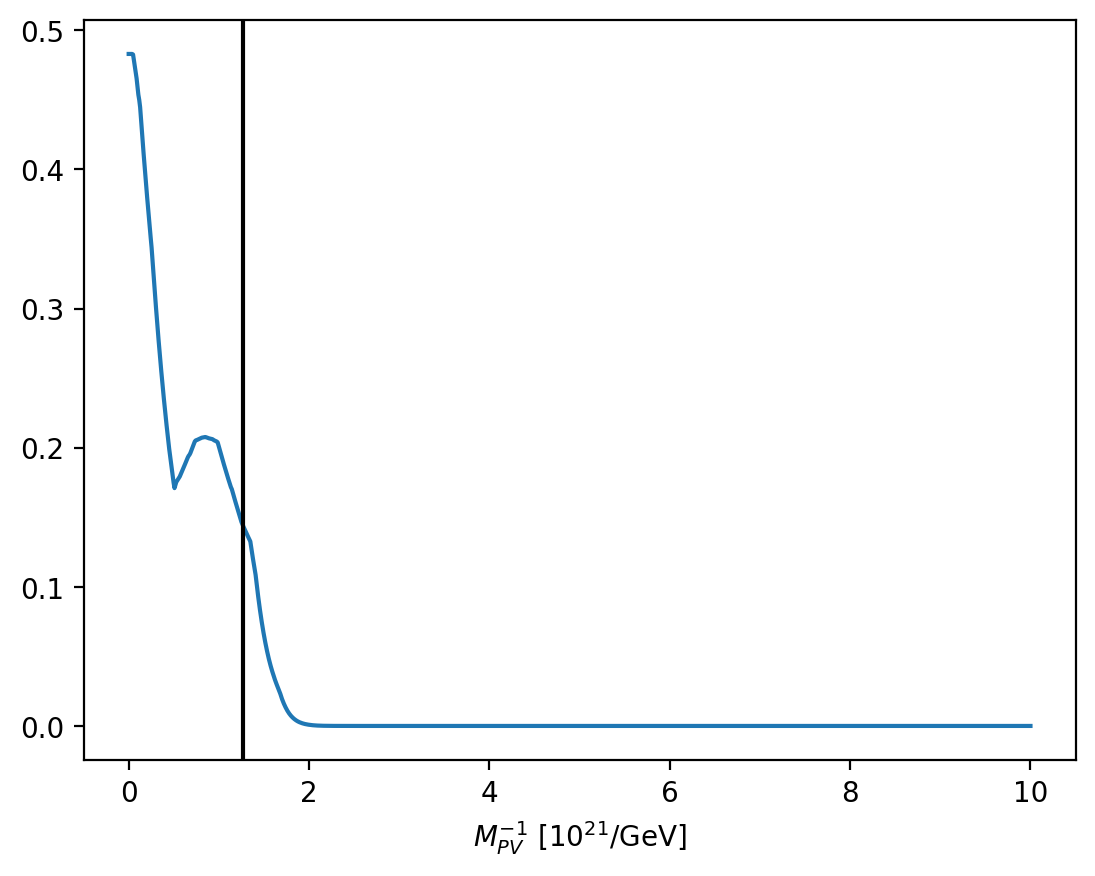

In [7]:
plt.plot(joint_likelihood_xs, np.exp(log_likelihood))

cl = np.cumsum(np.exp(log_likelihood))
i = np.argmin(np.abs(cl - 0.9*cl[-1]))

plt.axvline(joint_likelihood_xs[i], color='k')

plt.xlabel(r'$M_{PV}^{-1}$ [$10^{21} / \mathrm{GeV}$]')

Text(0, 0.5, 'Distance')

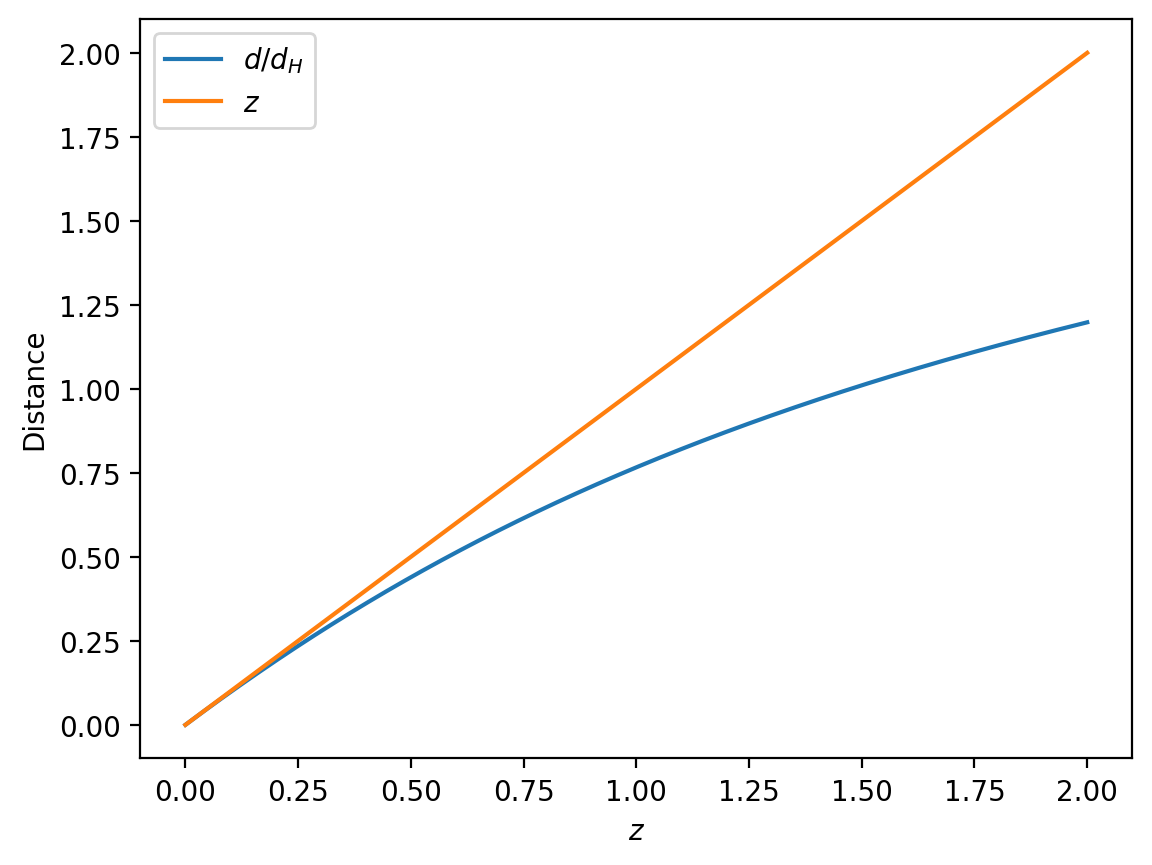

In [8]:
z = np.linspace(0, 2, 1024)
plt.plot(z, Planck18.comoving_distance(z) / Planck18.hubble_distance, label=r'$d / d_H$')
plt.plot(z, z, label=r'$z$')
plt.legend()
plt.xlabel(r'$z$')
plt.ylabel('Distance')

In [9]:
kappa = pd.read_feather('/Users/wfarr/Research/PhaseBirefringence/src/data/samples_posterior_birefringence.feather')

(0.0, 4.001799904870079)

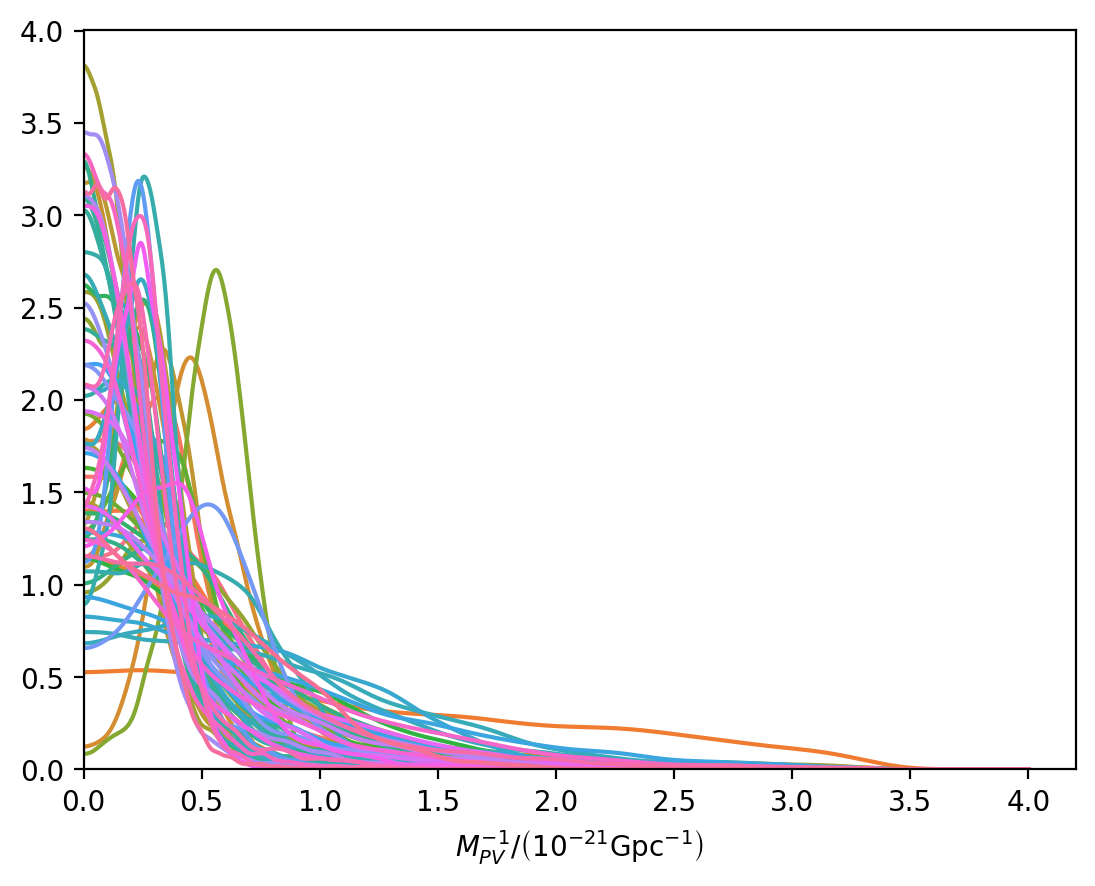

In [30]:
event_kappas = kappa.groupby("event")
with sns.color_palette('husl', n_colors=len(event_kappas)):
    for e, df in event_kappas:
        mpvinv = df['kappa'] / 3e-22 * 1e-21
        x = np.linspace(0, 4, 1024)
        k = gaussian_kde(np.abs(mpvinv))
        plt.plot(x, k(x) + k(-x), label=e)
plt.xlabel(r'$M_{PV}^{-1} / \left( 10^{-21} \mathrm{Gpc}^{-1}\right)$')
plt.xlim(left=0)
plt.ylim(bottom=0)

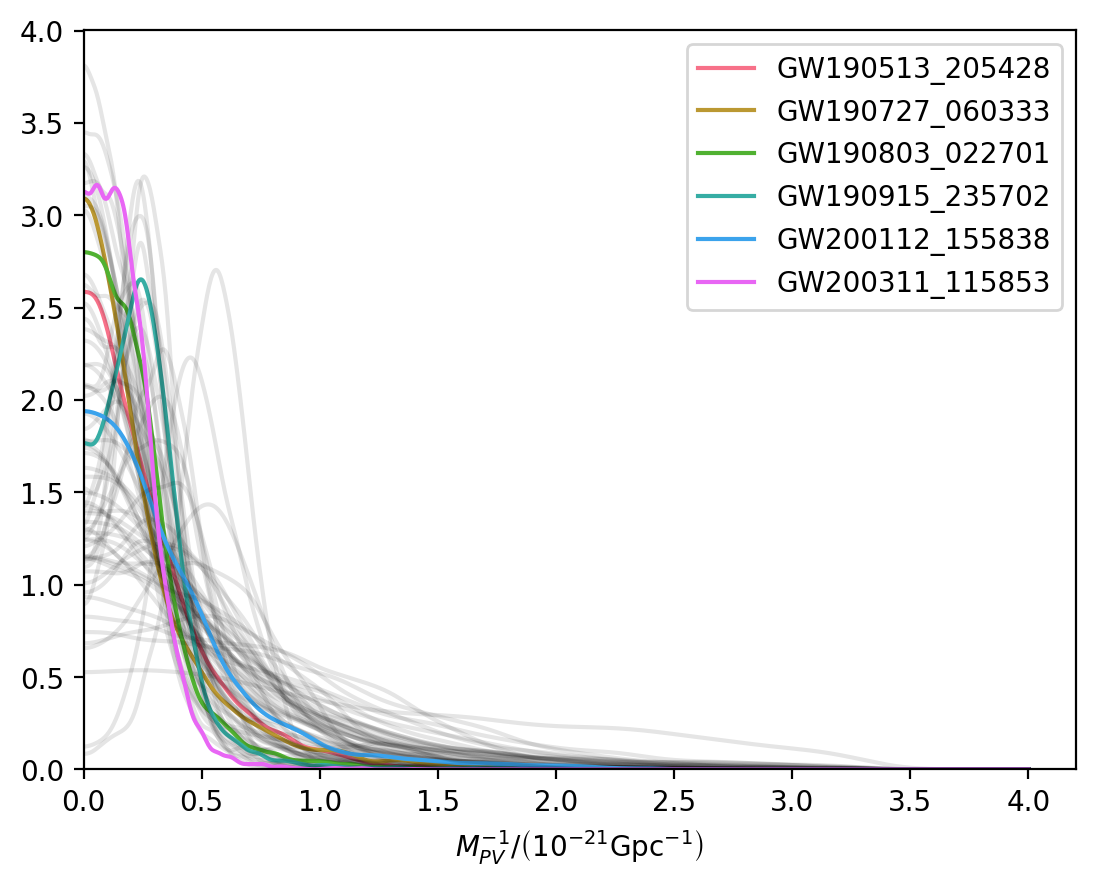

In [31]:
event_kappas = kappa.groupby("event")
special_event_list = ['GW190727', 'GW200112', 'GW190513', 'GW190915', 'GW190803', 'GW200311']
i = 0
with sns.color_palette('husl', n_colors=len(special_event_list)):
    for e, df in event_kappas:
        mpvinv = df['kappa'] / 3e-22 * 1e-21
        x = np.linspace(0, 4, 1024)
        k = gaussian_kde(np.abs(mpvinv))
        if e[:8] in special_event_list:
            color = sns.color_palette()[i]
            alpha = 1
            i += 1
        else:
            color = 'k'
            alpha=0.1
        plt.plot(x, k(x) + k(-x), label=(e if color != 'k' else None), color=color, alpha=alpha)
plt.xlabel(r'$M_{PV}^{-1} / \left( 10^{-21} \mathrm{Gpc}^{-1}\right)$')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.legend()

In [45]:
mpvinv = kappa[kappa['event']==e_special]['kappa'] / 3e-22 * 1e21

In [46]:
mpvinv

330000   -1.918338e+41
330001   -2.126077e+40
330002   -6.898269e+40
330003   -1.216319e+41
330004    7.016540e+40
              ...     
339995    1.466319e+41
339996    1.127028e+42
339997   -1.116804e+42
339998   -8.698943e+39
339999    1.708834e+40
Name: kappa, Length: 10000, dtype: float64

(0.0, 3.245211097218285)

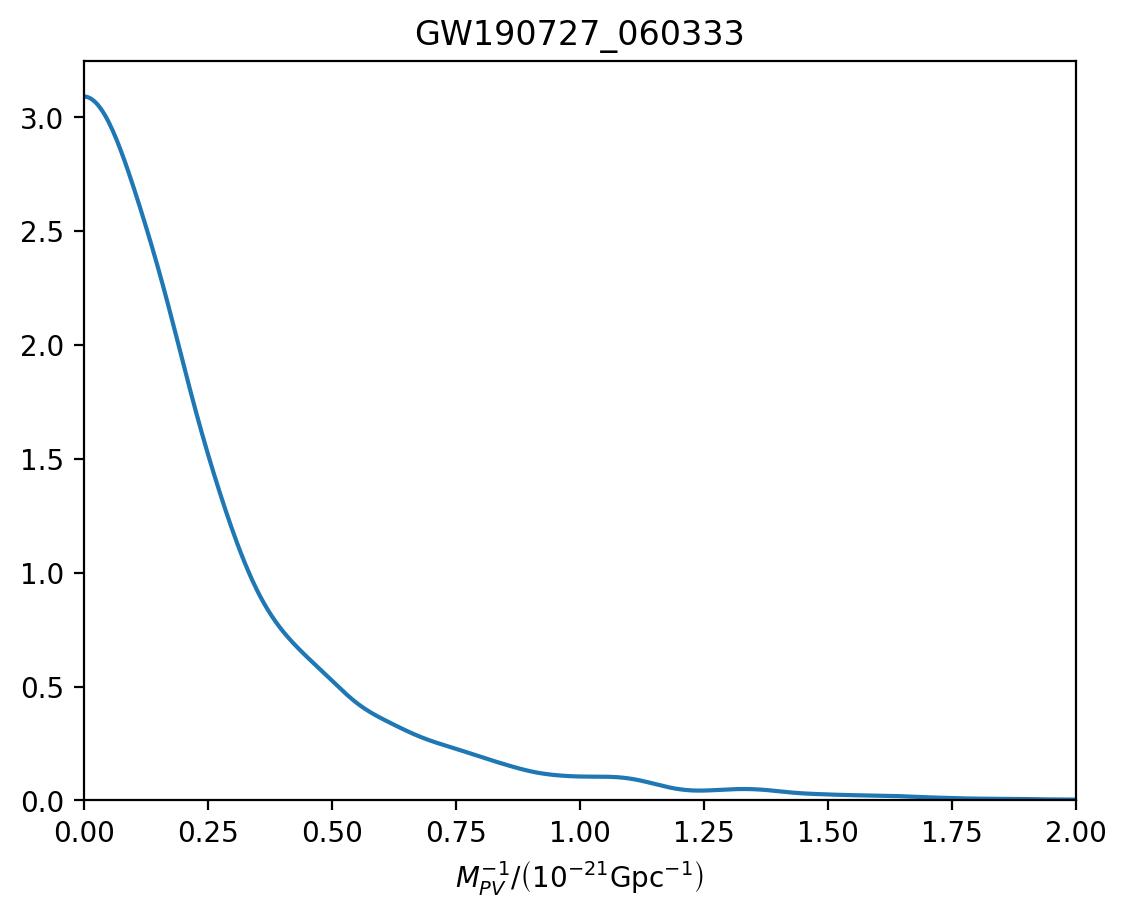

In [48]:
e_special = 'GW190727_060333'
mpvinv = kappa[kappa['event']==e_special]['kappa'] / 3e-22 * 1e-21
k = gaussian_kde(np.abs(mpvinv))
plt.plot(x, k(x) + k(-x))
plt.xlabel(r'$M_{PV}^{-1} / \left( 10^{-21} \mathrm{Gpc}^{-1}\right)$')
plt.title(e_special)
plt.xlim(left=0, right=2)
plt.ylim(bottom=0)